<a href="https://colab.research.google.com/github/AnilSharma09/CODSOFT/blob/main/TASK_5_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv.zip to creditcard.csv.zip
Dataset shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739 

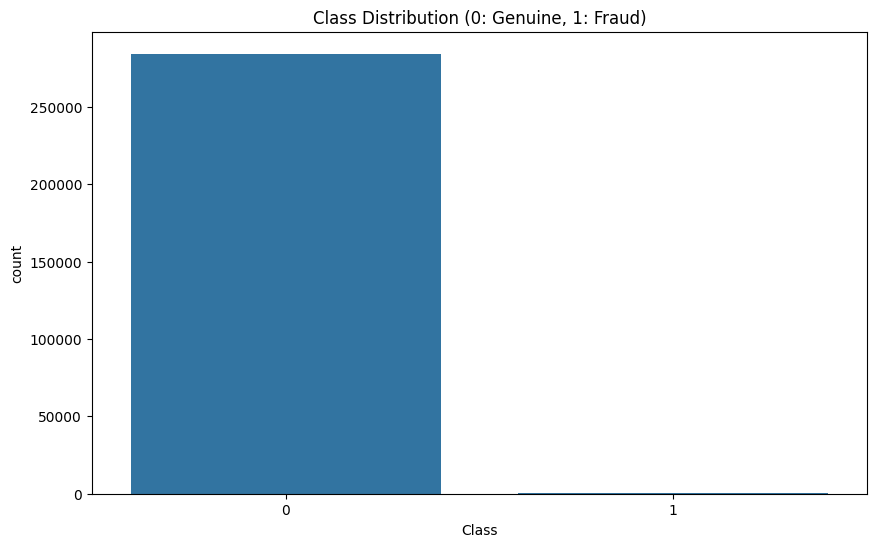

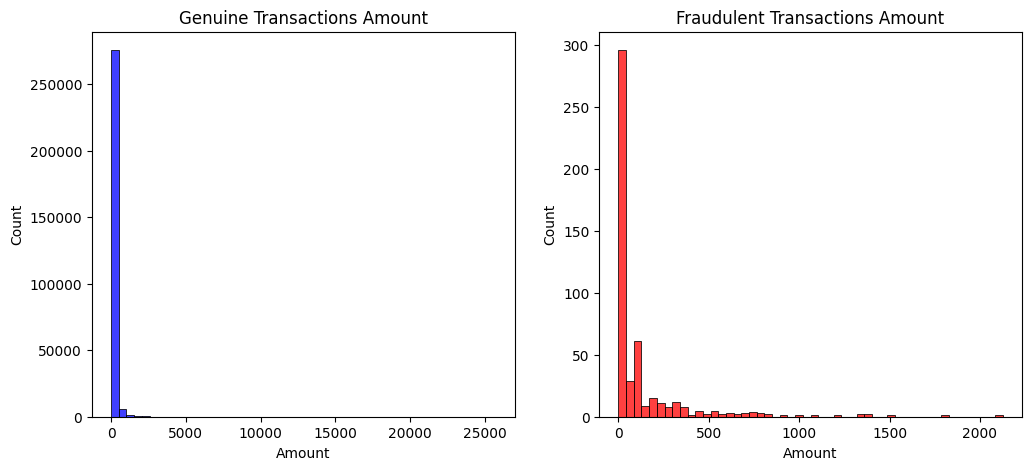


=== Logistic Regression ===
Accuracy: 0.9773
Precision: 0.0634
Recall: 0.8784
F1-Score: 0.1182
ROC AUC: 0.9658

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



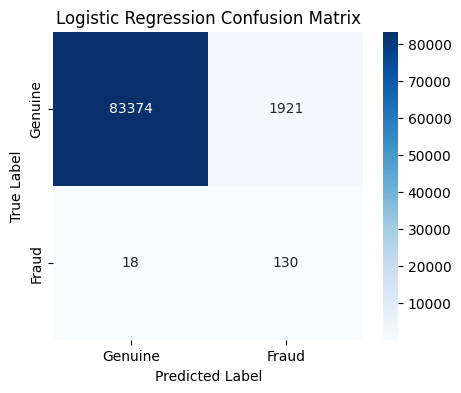


=== Random Forest ===
Accuracy: 0.9994
Precision: 0.8603
Recall: 0.7905
F1-Score: 0.8239
ROC AUC: 0.9511

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.79      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



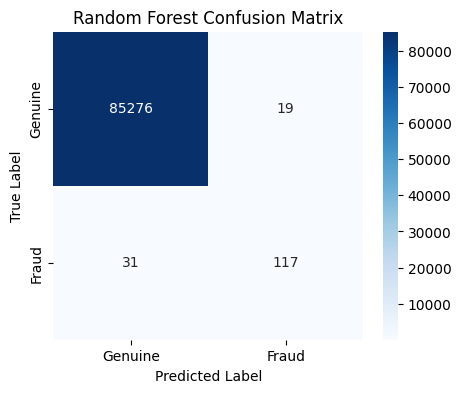


=== XGBoost ===
Accuracy: 0.9985
Precision: 0.5422
Recall: 0.8243
F1-Score: 0.6542
ROC AUC: 0.9661

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.54      0.82      0.65       148

    accuracy                           1.00     85443
   macro avg       0.77      0.91      0.83     85443
weighted avg       1.00      1.00      1.00     85443



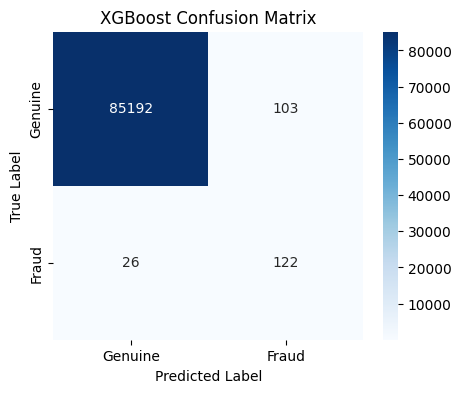

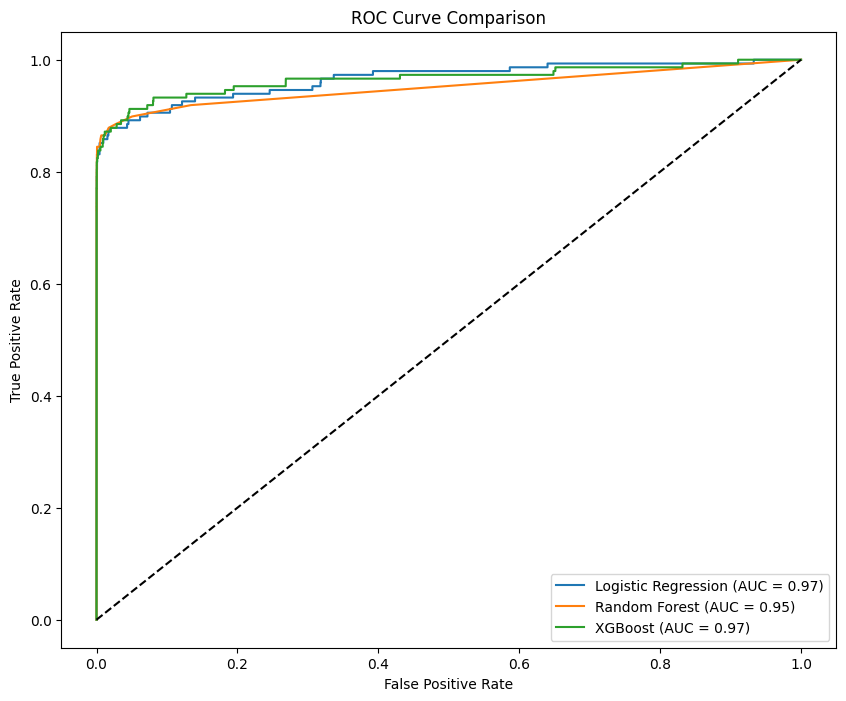

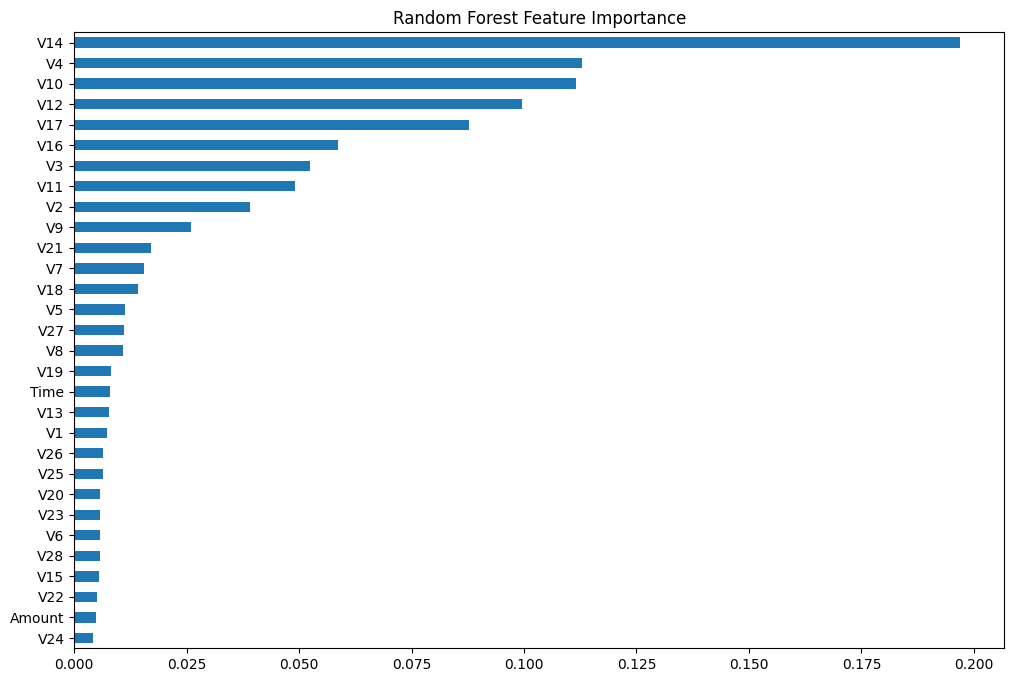


Sample Fraud Transaction 1:
Model Confidence: 1.0000
Predicted Class: Fraud
Top 3 Suspicious Features:
- V14: -4.4521
- V4: 2.0641
- V10: -2.7558

Sample Fraud Transaction 2:
Model Confidence: 0.8600
Predicted Class: Fraud
Top 3 Suspicious Features:
- V14: -9.7980
- V4: 5.5810
- V10: -14.6765

Sample Fraud Transaction 3:
Model Confidence: 0.8700
Predicted Class: Fraud
Top 3 Suspicious Features:
- V14: -10.7163
- V4: 8.0054
- V10: -3.0512


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

In [ ]:
# -*- coding: utf-8 -*-
"""
Credit Card Fraud Detection - CodSoft Task 5
"""

# Step 1: Install required packages
!pip install pandas scikit-learn imbalanced-learn xgboost seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Step 3: Load dataset
from google.colab import files
uploaded = files.upload()

# Using creditcard.csv (can replace with your dataset)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Step 4: Exploratory Data Analysis (EDA)
print("\nClass Distribution:")
print(df['Class'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Genuine, 1: Fraud)')
plt.show()

# Transaction amount distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Genuine')
plt.title('Genuine Transactions Amount')
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud')
plt.title('Fraudulent Transactions Amount')
plt.show()

# Step 5: Data Preprocessing
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the 'Amount' and 'Time' features
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

# Step 6: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)

# Step 7: Model Training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}

results = {}
for name, model in models.items():
    # Create pipeline with SMOTE
    pipeline = ImbPipeline(steps=[
        ('smote', smote),
        ('classifier', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for ROC

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'model': pipeline
    }

    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Genuine', 'Fraud'],
                yticklabels=['Genuine', 'Fraud'])
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Step 8: ROC Curve Comparison
plt.figure(figsize=(10, 8))
for name in models.keys():
    y_prob = results[name]['model'].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# Step 9: Feature Importance (for best model)
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['model']

if best_model_name == "Random Forest":
    importances = best_model.named_steps['classifier'].feature_importances_
elif best_model_name == "XGBoost":
    importances = best_model.named_steps['classifier'].feature_importances_
else:
    importances = np.abs(best_model.named_steps['classifier'].coef_[0])

# Plot feature importance
feature_importance = pd.Series(importances, index=X.columns)
plt.figure(figsize=(12, 8))
feature_importance.sort_values().plot(kind='barh')
plt.title(f'{best_model_name} Feature Importance')
plt.show()

# Step 10: Sample Fraud Predictions
fraud_samples = X_test[y_test == 1].sample(3, random_state=42)
for i, (idx, row) in enumerate(fraud_samples.iterrows(), 1):
    sample = row.values.reshape(1, -1)
    prob = best_model.predict_proba(sample)[0, 1]
    pred = best_model.predict(sample)[0]

    print(f"\nSample Fraud Transaction {i}:")
    print(f"Model Confidence: {prob:.4f}")
    print(f"Predicted Class: {'Fraud' if pred == 1 else 'Genuine'}")
    print("Top 3 Suspicious Features:")
    top_features = feature_importance.sort_values(ascending=False).index[:3]
    for feat in top_features:
        print(f"- {feat}: {row[feat]:.4f}")